In [25]:
pip install gurobipy


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install numpy matplotlib



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Objective
Minimize waiting time, commute time, and travel distances for elderly passengers.

### Constraints
- **Bus and car capacities**: 
    - 7 buses (14 seats each)
    - 1 car (4 seats)
- **Daily passenger range**: 
    - 85–130 elderly passengers
- **Ad hoc requests** from passengers
- **Balance work for each drivers**

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
rnd = np.random
rnd.seed(0)

In [29]:
n = 30
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

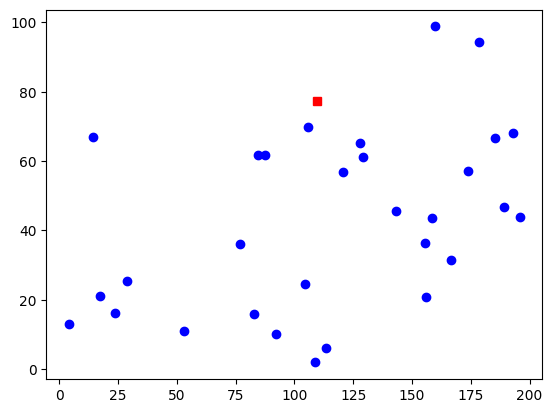

In [30]:
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='b')

In [31]:
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j):np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}
Q = 14
q = {i:rnd.randint(1,10) for i in N}

In [ ]:
from gurobipy import Model, GRB, quicksum

In [33]:
mdl = Model('CVRP')

In [34]:
x = mdl.addVars(A, vtype=GRB.BINARY)
# variable clients
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [35]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[a]*c[a] for a in A))

In [36]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)==1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for j in V if i!=j)==1 for i in N);
mdl.addConstrs((x[i,j]==1)>>(u[i]+q[i]==u[j]) for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i]>=q[i] for i in N);
mdl.addConstrs(u[i]<=Q for i in N);

In [37]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30 #seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.6.0 23G93)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  30
MIPGap  0.1

Optimize a model with 120 rows, 960 columns and 1860 nonzeros
Model fingerprint: 0xba036bc9
Model has 870 simple general constraints
  870 INDICATOR
Variable types: 30 continuous, 930 integer (930 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 405 rows and 0 columns
Presolve removed 0 rows and 571 columns
Presolve time: 0.02s
Presolved: 525 rows, 389 columns, 2294 nonzeros
Variable types: 33 continuous, 356 integer (356 binary)
Found heuristic solution: objective 1985.5499222
Found heuris

In [39]:
active_arcs = [a for a in A if x[a].x>0.99]

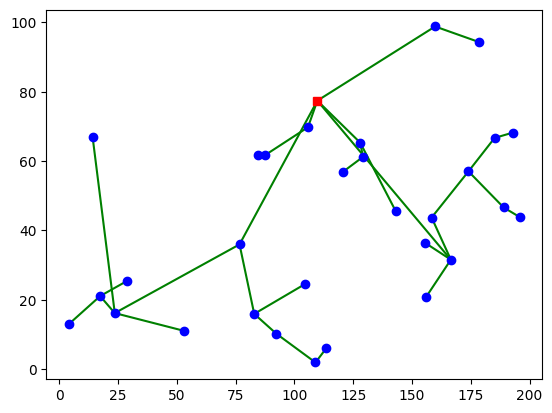

In [40]:
for i,j in active_arcs:
    plt.plot([xc[i],xc[j]],[yc[i],yc[j]],c='g',zorder=0)
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='b')